In [2]:
from typing import Callable, List
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'bright'])

In [ ]:
def sumSeries(
    series: Callable[[float, int, float], float],
    coefs: List[float],
    args: List[float],
    optimize: bool = False
) -> float:
    
    if optimize:
        return np.sum(np.sum(func(coefs, np.array(range(coefs.size)), i)) for i in args)
    else:
        sum = 0
        for x in args:
            tmp = 0
            for n in range(coefs.size):
                tmp += series(coefs[n], n, x)
            sum += tmp
        return sum
    

In [116]:
func = lambda coef, n, arg: coef * np.cos(n * arg)
x = np.linspace(-2 * np.pi, 2 * np.pi, num = 10**3, endpoint = True)

In [117]:
N = 10
coefs = np.ones(N)
coefs[:int(N / 3)] = [(2 * n + 1) / 3 for n in range(int(N / 3))]
coefs[int(2 * N / 3):] = [1 / n for n in range(int(2 * N / 3), N)]

def getCoefArray(N: int) -> np.array:
    coefs = np.ones(N)
    coefs[:int(N / 3)] = [(2 * n + 1) / 3 for n in range(int(N / 3))]
    coefs[int(2 * N / 3):] = [1 / n for n in range(int(2 * N / 3), N)]
    return coefs

In [125]:
%%time
sum = sumSeries(func, getCoefArray(10), x, optimize = False)
print(sum)

339.54563492063386
CPU times: total: 31.2 ms
Wall time: 18 ms


In [126]:
%%time
sum = sumSeries(func, getCoefArray(10), x, optimize = True)
print(sum)

339.5456349206339
CPU times: total: 15.6 ms
Wall time: 14 ms


C:\Users\dinoz.DESKTOP-98K3K7L\AppData\Local\Temp\ipykernel_24064\4253160851.py:9: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(np.sum(func(coefs, np.array(range(coefs.size)), i)) for i in args)


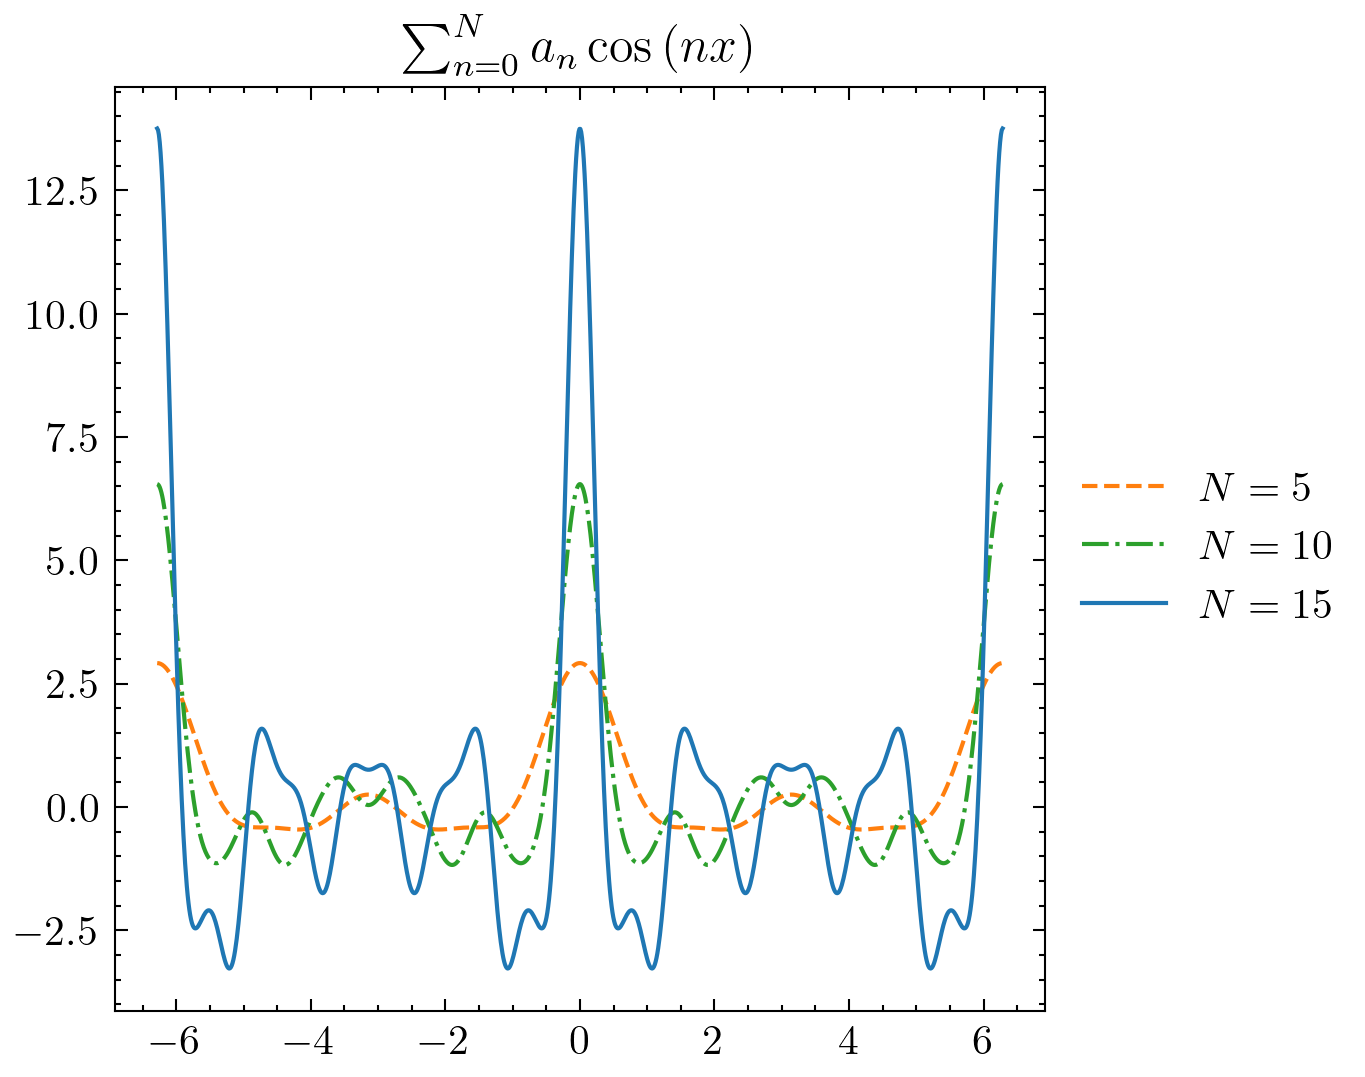

In [128]:
fig, ax = plt.subplots(1, 1, figsize = (4, 4), dpi = 300)
ax.set_title(r"$\sum^{N}_{n = 0} a_n \cos{(n x)}$")
ax.plot(x, [np.sum(func(getCoefArray(5), np.array(range(getCoefArray(5).size)), i)) for i in x], label = r"$N = 5$", color = "tab:orange", linestyle = "dashed")
ax.plot(x, [np.sum(func(getCoefArray(10), np.array(range(getCoefArray(10).size)), i)) for i in x], label = r"$N = 10$", color = "tab:green", linestyle = "dashdot")
ax.plot(x, [np.sum(func(getCoefArray(15), np.array(range(getCoefArray(15).size)), i)) for i in x], label = r"$N = 15$", color = "tab:blue")
plt.legend(bbox_to_anchor = (1, 0.5), loc = 'center left')
plt.show()